<a href="https://colab.research.google.com/github/neiladvani21/Sparks-Foundation-Task-1/blob/main/Data_Mining_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
import random

warnings.filterwarnings('ignore')
seed = 42

# 1. Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

# 2. Data Analysis

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
init_nums = train.dtypes[train.dtypes!='object'].index
init_nums 

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
#After manually going through each columns in init_num, this is the outcome

num_countable = ['MSSubClass', 'OverallQual', 'OverallCond','BedroomAbvGr', 'KitchenAbvGr', 
                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

num_cols = ['LotFrontage','LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
           'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
            '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [ ]:
init_cats = train.dtypes[train.dtypes == 'object'].index
init_cats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
train[num_cols]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0


In [ ]:
train[num_cols].isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

- LotFontage has almost 18% of missing data.
- MasVnrArea has 8 only 8 rows missing which can be managed easily.

In [ ]:
train[num_cols].isin([0]).sum()

LotFrontage         0
LotArea             0
MasVnrArea        861
BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
1stFlrSF            0
2ndFlrSF          829
LowQualFinSF     1434
GrLivArea           0
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
dtype: int64

- BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal has huge amount of rows filled with zeros.

In [ ]:
cat_cols = list(init_cats)

In [ ]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
train[cat_cols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
train[cat_cols].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

- Alley, FireplaceQu, PolQC, Fence, MiscFeature has significant number of missing values.

In [ ]:
train[num_countable]

,MSSubClass,OverallQual,OverallCond,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,60,7,5,3,1,8,0,2,1,0,2,1
1,20,6,8,3,1,6,1,2,0,1,2,0
2,60,7,5,3,1,6,1,2,1,0,2,1
3,70,7,5,3,1,7,1,3,1,0,1,0
4,60,8,5,4,1,9,1,3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,3,1,7,1,2,0,0,2,1
1456,20,6,6,3,1,7,2,2,1,0,2,0
1457,70,7,9,4,1,9,2,1,0,0,2,0
1458,20,5,6,2,1,5,0,1,1,0,1,0


In [ ]:
train[num_countable].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64

In [ ]:
train[date_cols]

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008
...,...,...,...,...,...
1455,1999,2000,1999.0,8,2007
1456,1978,1988,1978.0,2,2010
1457,1941,2006,1941.0,5,2010
1458,1950,1996,1950.0,4,2010


In [ ]:
train[date_cols].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MoSold           0
YrSold           0
dtype: int64

- GarageYrBlt has 81 rows of mising value, does that mean garage is not there?

***Descriptive statistics of the numeric columns***

In [ ]:
train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0


***Lets also have a glance of all the numeric columns and their dependencies on each other.***

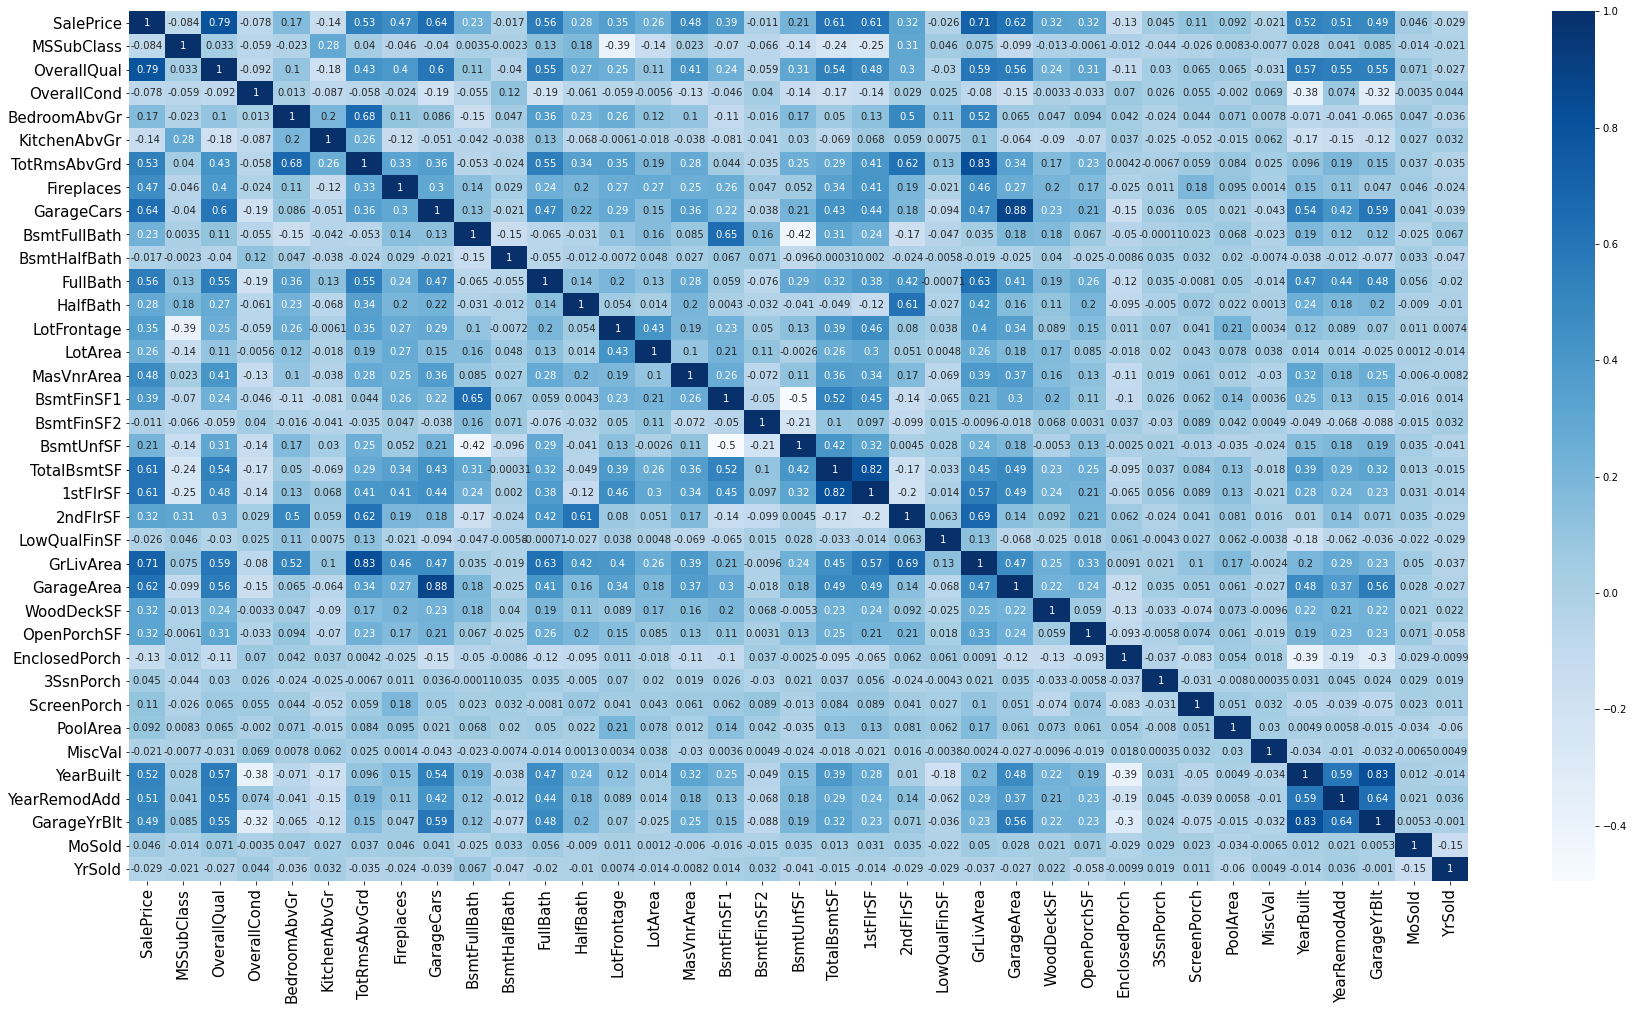

In [ ]:
all_num_col = ['SalePrice'] + num_countable + num_cols + date_cols

plt.figure(figsize=(30, 16))
corr = train[all_num_col].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

***Correlation between different features***

*High Correlation* 

- TotRmsAbvGrd vs GrLivArea - 0.83
- GarageCars vs GarageArea - 0.88
- 1stFlrSF vs TotalBsmtSF - 0.82
- GarageYrBlt vs YearBuilt - 0.83

*Moderate Correlation*

- TotRomsAbvGrd vs BedroomAbvGr - 0.68
- GrLivArea vs 2ndFlrSF - 0.69
- BsmtFullBath vs BsmtFinSF1 - 0.65
- GarageYrBlt vs YearRemodAdd - 0.64
- GrLivArea vs FullBath - 0.63
- TotRmsAbvGrd vs 2ndFlrSF - 0.62
- 2ndFlrSF vs HalfBath - 0.61
- OverallQual vs GarageCars - 0.6
- GrLivArea vs OverallQual - 0.59
- GarageArea vs OverallQual - 0.59
- YearRemodAdd vs YearBult - 0.59
- 1stFlrSF vs GrLivArea - 0.57
- FullBath vs OverallQual - 0.55
- FullBath vs TotRmsAbvGrd - 0.55
- TotalBsmtSF vs OverallQual - 0.54


In [ ]:
remove_cols = ['GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr', '1stFlrSF']

In [ ]:
for col in remove_cols:
    if col in num_countable:
        num_countable.remove(col)
    if col in num_cols:
        num_cols.remove(col)

num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [ ]:
num_countable

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'KitchenAbvGr',
 'Fireplaces',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath']

***Visualizing the target***

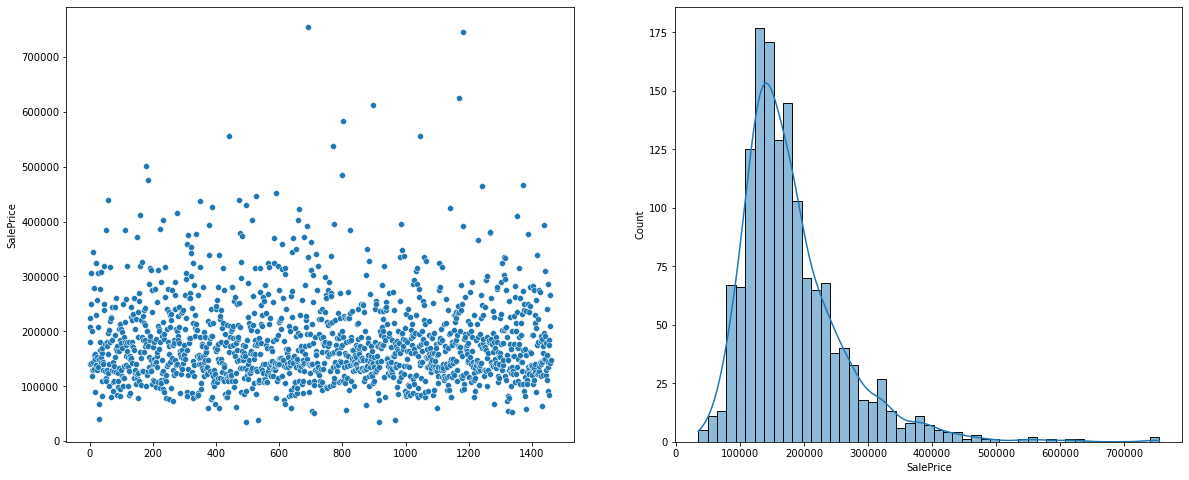

In [ ]:
#Plotting the target

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(y = 'SalePrice', x = train.index, data=train, ax=ax[0])
sns.histplot(x='SalePrice', data=train, kde=True, ax=ax[1])
fig.show()

In [ ]:
def dist_plot(df, columns, kind='scatter', label='SalePrice', basis=None):
    plt.figure(figsize=(20, 16))
    
    for idx, column in enumerate(columns):
        f = plt.subplot(5, 4, idx+1)
        if kind == 'scatter':
            g = sns.scatterplot(x = column, y = label, data = df, hue=basis)
        elif (kind == 'histplot'):
            g = sns.histplot(x = column, data = df, hue=basis, kde=True)
        elif (kind =='boxplot'):
            g = sns.boxplot(x = column, data=df, hue=basis)
    plt.tight_layout()
    
def count_plot(df, columns, label='SalePrice', kind = 'countplot', basis=None):
    plt.figure(figsize=(24, 18))
    
    for idx, column in enumerate(columns):
        f = plt.subplot(6, 4, idx+1)
        
        if kind == 'countplot':
            g= sns.countplot(x = column, data = df, hue=basis)
            
        if kind == 'barplot':
            g= sns.barplot(x = column, y=label, data = df, hue=basis)    
    plt.tight_layout()

***Analyzing the numeric features***

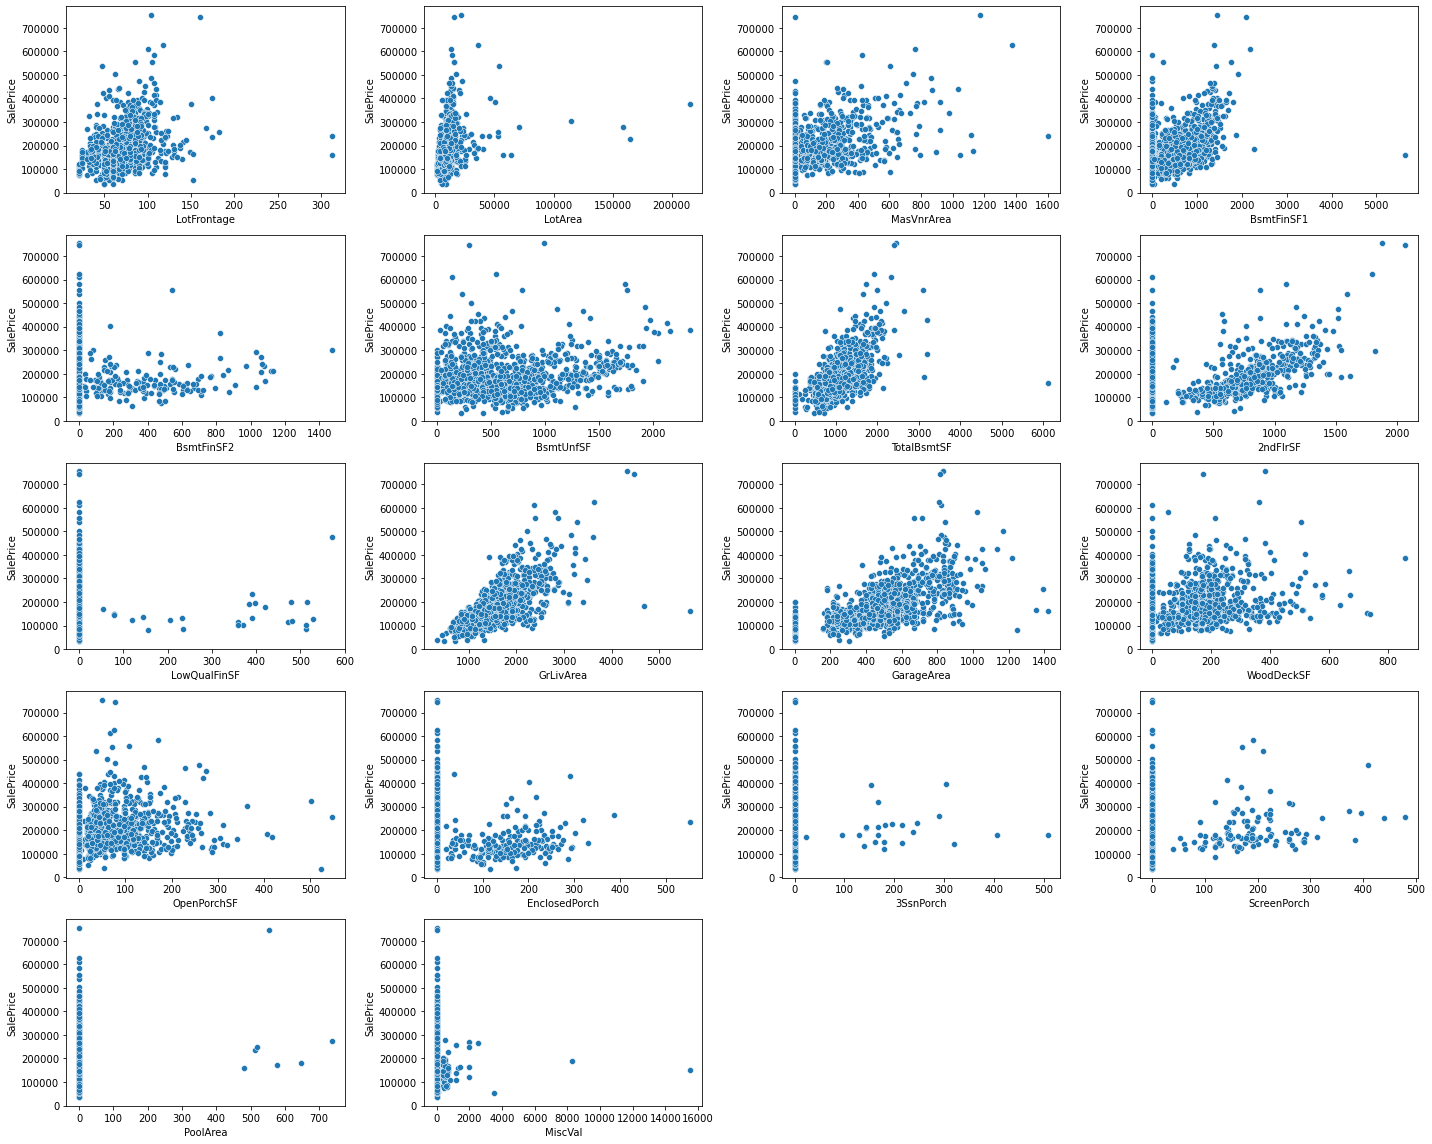

In [ ]:
dist_plot(train, num_cols)

In [ ]:
#remove_cols = ['GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr', '1stFlrSF']
cols_to_del = ['MiscVal', 'PoolArea', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','OpenPorchSF', 'WoodDeckSF', 
               'LowQualFinSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'MasVnrArea']

for col in cols_to_del:
    remove_cols.append(col)
    
remove_cols

['GarageCars',
 'TotRmsAbvGrd',
 'BedroomAbvGr',
 '1stFlrSF',
 'MiscVal',
 'PoolArea',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'OpenPorchSF',
 'WoodDeckSF',
 'LowQualFinSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'MasVnrArea']

In [ ]:
 new_col_rpl = {'MiscVal': 'HasSpecialFeature', 'PoolArea': 'HasPoolArea', 'EnclosedPorch': 'HasEnclosedPorch',
               '3SsnPorch': 'Has3SsnPorch', 'ScreenPorch': 'HasScreenPorch', 'OpenPorch': 'HsOpenPorch', 'WoodDeckSF': 'HasWoodDeck',
               'LowQualSF': 'HasLowQual', '2ndFlrSF': 'Has2ndFlr', 'BsmtFinSF1': 'HasType1Finishing', 
                'BsmtFinSF2': 'HasType2Finishing', 'MasVnrArea': 'HasMasVnrArea'}

***Analyzing the countable features***

In [ ]:
num_countable

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'KitchenAbvGr',
 'Fireplaces',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath']

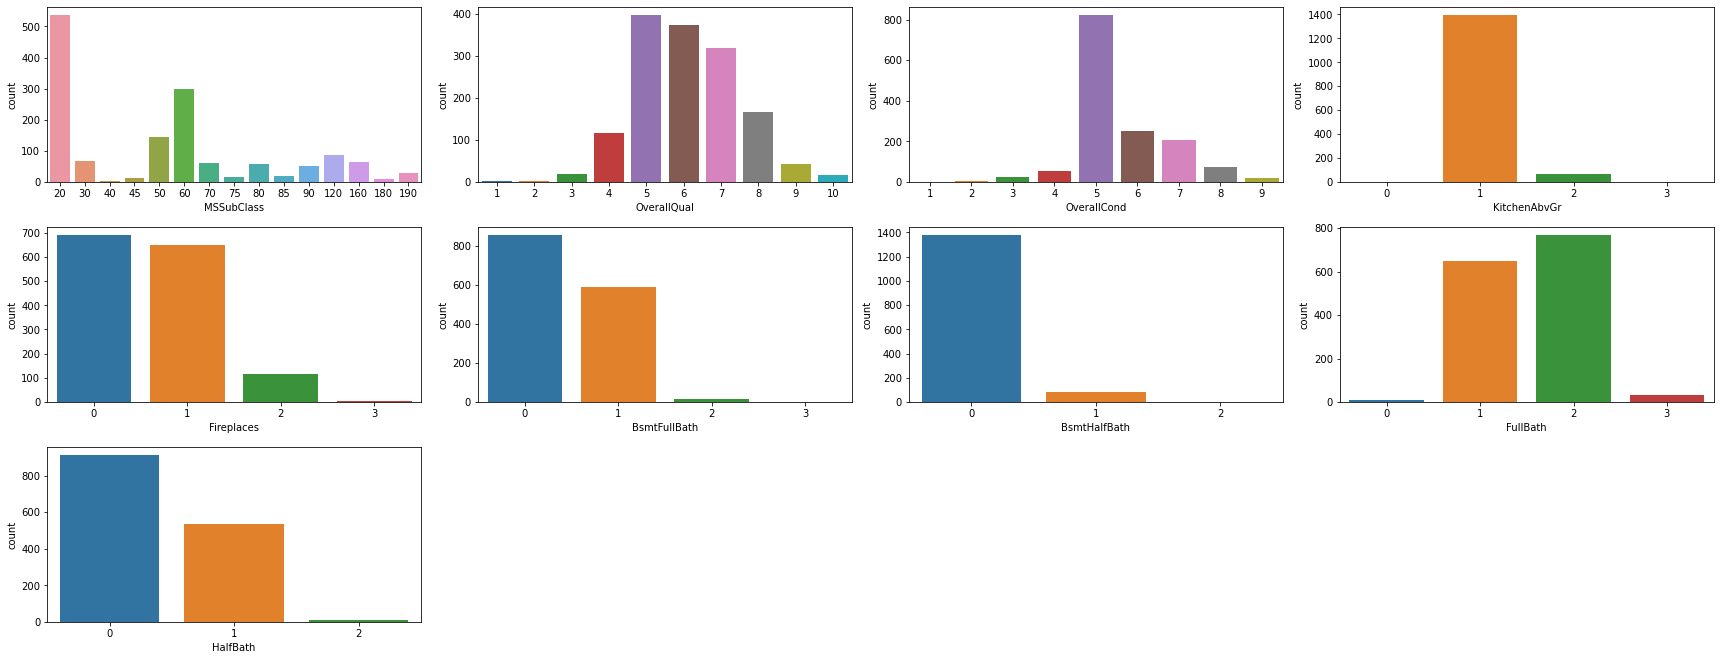

In [ ]:
count_plot(train, num_countable)

***Analyzing categorical features***

In [ ]:
train[cat_cols].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [ ]:
cat_col_nan = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
              'Fence', 'MiscFeature']

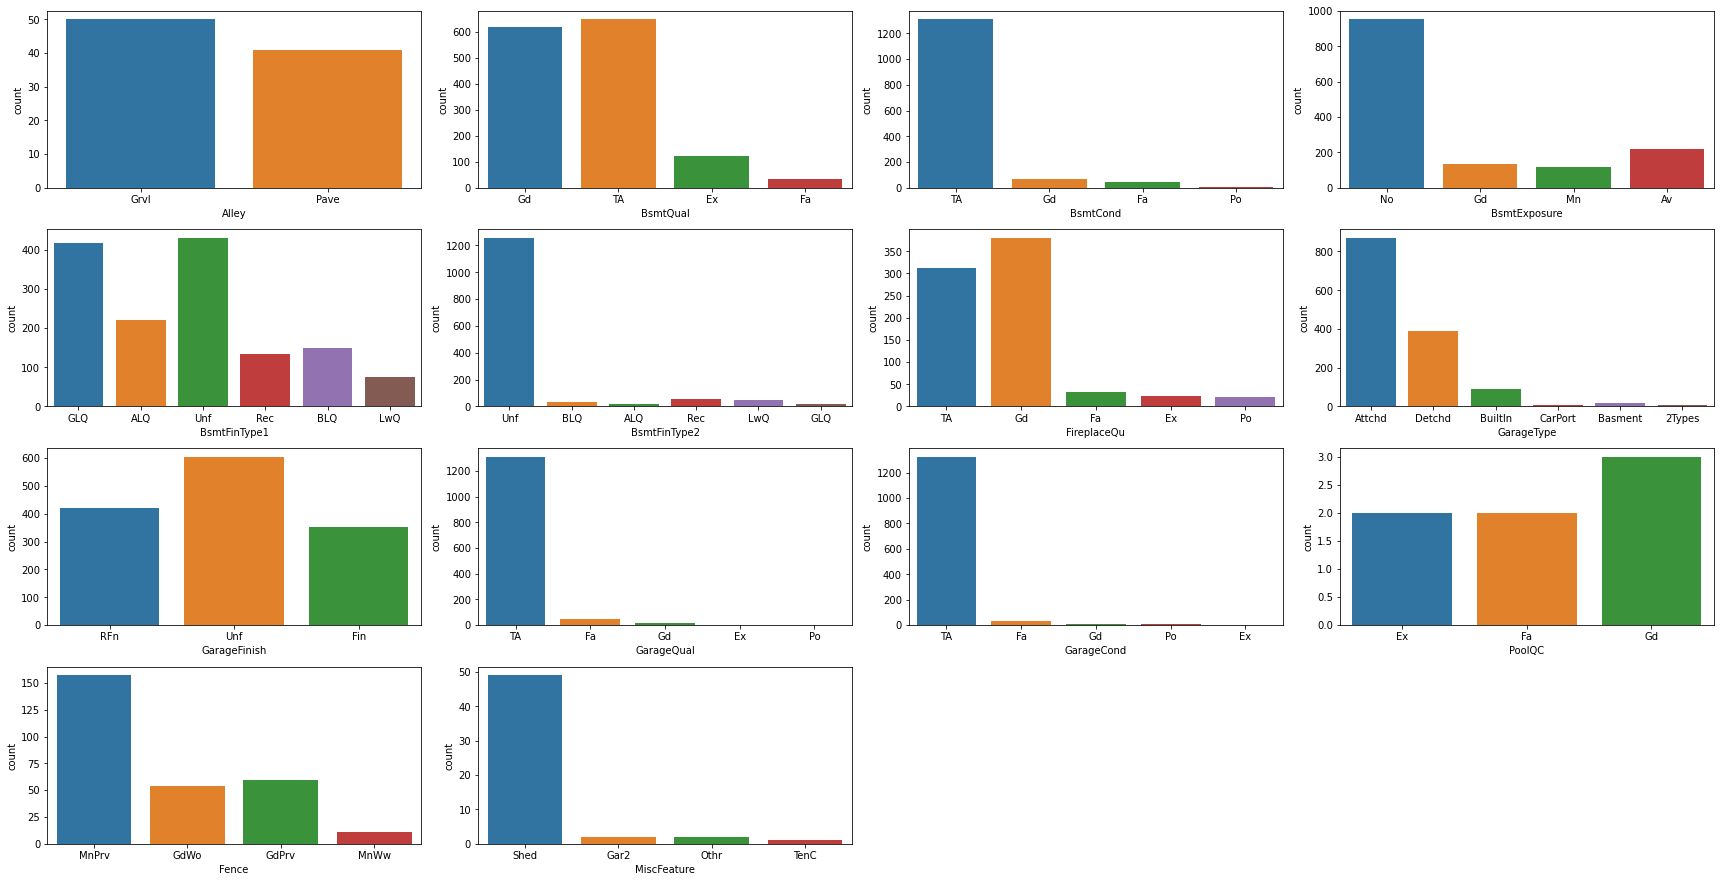

In [ ]:
#Verifying the categorical features which has null values

count_plot(train, cat_col_nan)

In [ ]:
remove_cols.append('GarageCond')
remove_cols

['GarageCars',
 'TotRmsAbvGrd',
 'BedroomAbvGr',
 '1stFlrSF',
 'MiscVal',
 'PoolArea',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'OpenPorchSF',
 'WoodDeckSF',
 'LowQualFinSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'MasVnrArea',
 'GarageCond']

In [ ]:
# trans_nan_cols = {'Alley': 'No Alley', 'FireplaceQu': 'No Fireplace', 'PoolQC': 'No Pool', 'Fence': 'No Fence',
#                  'MiscFeature': 'No MiscFeature', 'GarageType': 'No Garage', 'GarageFinish': 'No Garage', 
#                   'GarageQual': 'No Garage'}

cat = train.copy()

for col in cat.columns:
    cat.loc[(cat[col].isnull()) | (cat[col] == 'None') | (cat[col] == 'No'), col] = 'No'+' '+col

cat

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,No PoolQC,No Fence,No MiscFeature,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,No PoolQC,No Fence,No MiscFeature,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,No PoolQC,No Fence,No MiscFeature,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,No PoolQC,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,No PoolQC,No Fence,No MiscFeature,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,...,0,No PoolQC,No Fence,No MiscFeature,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,AllPub,...,0,No PoolQC,MnPrv,No MiscFeature,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,AllPub,...,0,No PoolQC,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No Alley,Reg,Lvl,AllPub,...,0,No PoolQC,No Fence,No MiscFeature,0,4,2010,WD,Normal,142125


In [ ]:
cat[cat_cols].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
#Checking Neighbourhood column

df_nei = train.groupby(['Neighborhood']).aggregate({'SalePrice': ['mean', 'count']}).reset_index()

df_nei.columns = ['Neighbor', 'Sale_Mean', 'Homes']

df_nei = df_nei.sort_values(by='Sale_Mean')
df_nei

,Neighbor,Sale_Mean,Homes
10,MeadowV,98576.470588,17
9,IDOTRR,100123.783784,37
2,BrDale,104493.750000,16
3,BrkSide,124834.051724,58
7,Edwards,128219.700000,100
17,OldTown,128225.300885,113
19,Sawyer,136793.135135,74
1,Blueste,137500.000000,2
18,SWISU,142591.360000,25
13,NPkVill,142694.444444,9


In [ ]:
#Can create probabilities of each neighbourhod

df_nei['NeighProba'] = df_nei['Homes']/train.shape[0]
df_nei

,Neighbor,Sale_Mean,Homes,NeighProba
10,MeadowV,98576.470588,17,0.011644
9,IDOTRR,100123.783784,37,0.025342
2,BrDale,104493.750000,16,0.010959
3,BrkSide,124834.051724,58,0.039726
7,Edwards,128219.700000,100,0.068493
17,OldTown,128225.300885,113,0.077397
19,Sawyer,136793.135135,74,0.050685
1,Blueste,137500.000000,2,0.001370
18,SWISU,142591.360000,25,0.017123
13,NPkVill,142694.444444,9,0.006164


In [ ]:
df_cond = train.groupby(['Condition1', 'Condition2']).aggregate({'SalePrice': ['mean', 'count']}).reset_index()

df_cond.columns = ['Condition1', 'Condition2', 'Sale_Mean', 'Homes']

df_cond = df_cond.sort_values(by='Sale_Mean')
df_cond

,Condition1,Condition2,Sale_Mean,Homes
3,Feedr,Feedr,85000.000000,1
7,Feedr,RRNn,96750.000000,2
0,Artery,Artery,106500.000000,2
16,RRNn,Feedr,128000.000000,1
13,RRAn,Feedr,128500.000000,4
1,Artery,Norm,132142.222222,45
6,Feedr,RRAn,136905.000000,1
12,RRAe,Norm,138400.000000,11
4,Feedr,Norm,143883.013158,76
8,Norm,Norm,184495.492063,1260


***Analyzing date columns***

In [ ]:
date_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [ ]:
trans_nan_cols = {'Alley': 'No Alley', 'FireplaceQu': 'No Fireplace', 'PoolQC': 'No Pool', 'Fence': 'No Fence',
                  'MiscFeature': 'No MiscFeature', 'GarageType': 'No Garage', 'GarageFinish': 'No Garage', 
                   'GarageQual': 'No Garage'}
                   
new_col_rpl = {'MiscVal': 'HasSpecialFeature', 'PoolArea': 'HasPoolArea', 'EnclosedPorch': 'HasEnclosedPorch',
               '3SsnPorch': 'Has3SsnPorch', 'ScreenPorch': 'HasScreenPorch', 'OpenPorch': 'HsOpenPorch', 'WoodDeckSF': 'HasWoodDeck',
               'LowQualSF': 'HasLowQual', '2ndFlrSF': 'Has2ndFlr', 'BsmtFinSF1': 'HasType1Finishing', 
             'BsmtFinSF2': 'HasType2Finishing', 'MasVnrArea': 'HasMasVnrArea', 'YearRemodAdd': 'IsRemodified'}

In [ ]:
for col in date_cols:
    remove_cols.append(col)
    
remove_cols

['GarageCars',
 'TotRmsAbvGrd',
 'BedroomAbvGr',
 '1stFlrSF',
 'MiscVal',
 'PoolArea',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'OpenPorchSF',
 'WoodDeckSF',
 'LowQualFinSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'MasVnrArea',
 'GarageCond',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MoSold',
 'YrSold']

In [ ]:
cat_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 
           'RoofStyle', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 
           'GarageFinish', 'SaleType', 'SaleCondition', 'FireplaceQu', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
            'KitchenQual', 'GarageQual', 'PavedDrive', 'Alley', 'Exterior1st', 'Exterior2nd']
cat_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition',
 'FireplaceQu',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageQual',
 'PavedDrive',
 'Alley',
 'Exterior1st',
 'Exterior2nd']

# 3. Data Preprocessing

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
def treat_outliers(X, columns):
    
    new_X = X.copy()
    new_X[columns] = X[columns].fillna(value=0)
    
    for column in columns:
        
        Q1 = np.percentile(new_X[column], 25.)
        Q2 = np.percentile(new_X[column], 50.)
        Q3 = np.percentile(new_X[column], 75.)
        
        IQR = (Q3 - Q1) * 1.5
        upper, lower = Q3 + IQR, Q1 - IQR
        
        new_X.loc[(new_X[column] > upper), column] = upper
        new_X.loc[(new_X[column] < lower), column] = lower
    
    return new_X

In [ ]:
y_train = train_out['SalePrice']
X_train = train_out.drop(['SalePrice'], axis=1)

In [ ]:
class CategoryTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.trans_nan_cols = {'Alley': 'No Alley', 'FireplaceQu': 'No Fireplace',
                 'GarageType': 'No Garage', 'GarageFinish': 'No Garage', 
                  'GarageQual': 'No Garage', 'BsmtQual': 'No Basement', 'BsmtCond': 'No Basement', 'BsmtExposure': 'No Basement',
                         'BsmtFinType1': 'No Basement', 'BsmtFinType2': 'No Basement', 'FireplaceQu': 'No Fireplace'}
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        new_X = X.copy()
        
        for col in self.trans_nan_cols.keys():
            new_X.loc[(new_X[col].isnull()) | (new_X[col] == 'None') | (new_X[col] == 'No'), col] = new_X.get(col)
        
        hot_enc = OneHotEncoder(drop='first', dtype='int', max_categories=4)
        enc_X = hot_enc.fit_transform(new_X).toarray()
        return enc_X

In [ ]:
cat_trans = CategoryTransformer()
cat_dt = cat_trans.transform(X_train[cat_cols])
cat_dt

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
class DataFilter(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cols_to_remove = ['Id','GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr', '1stFlrSF', 'MiscVal', 'PoolArea',
                               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'OpenPorchSF', 'WoodDeckSF', 'LowQualFinSF',
                               '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'MasVnrArea', 'GarageCond', 'YearBuilt', 'YearRemodAdd',
                               'GarageYrBlt', 'MoSold', 'YrSold', 'Street', 'Utilities', 'RoofMatl', 'PoolQC', 'GarageCond', 
                               'Neighborhood', 'Condition1', 'Condition2', 'MiscFeature', 'Fence']
        
        self.new_col_rpl = {'MiscVal': 'HasSpecialFeature', 'PoolArea': 'HasPool', 'EnclosedPorch': 'HasEnclosedPorch',
              '3SsnPorch': 'Has3SsnPorch', 'ScreenPorch': 'HasScreenPorch', 'OpenPorchSF': 'HsOpenPorch', 'WoodDeckSF': 'HasWoodDeck',
              'LowQualFinSF': 'HasLowQualFin', '2ndFlrSF': 'Has2ndFlr', 'BsmtFinSF1': 'HasType1Finishing', 
               'BsmtFinSF2': 'HasType2Finishing', 'MasVnrArea': 'HasMasVnrArea', 'YearRemodAdd': 'IsRemodified'}
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        new_X = X.copy()
        
        for old, new in self.new_col_rpl.items():
            new_X[new] = new_X[old].apply(lambda x: 1 if x !=0 else 0) 
        
        new_X['BuildingAge'] = new_X['YrSold'] - new_X['YearBuilt']
        
        probaSet = ['Neighborhood', 'Condition1', 'Condition2']
        
        for col in probaSet:
            probas = new_X[col].value_counts(normalize=True)
            prefix = col+'Proba'
            new_X[prefix] = new_X[col].apply(lambda x : probas[x])
        
        trans_X = new_X.drop(self.cols_to_remove, axis=1)
        return trans_X.to_numpy()

In [ ]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,MnPrv,NaN,0.0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,GdPrv,Shed,0.0,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,4,2010,WD,Normal


In [ ]:
all_cols = list(X_train.columns)

In [ ]:
#Certain numeric columns needs to be replaced and those has to be removed from num_cols list

filter_cols = []

new_col_rpl = {'MiscVal': 'HasSpecialFeature', 'PoolArea': 'HasPool', 'EnclosedPorch': 'HasEnclosedPorch',
              '3SsnPorch': 'Has3SsnPorch', 'ScreenPorch': 'HasScreenPorch', 'OpenPorchSF': 'HsOpenPorch', 'WoodDeckSF': 'HasWoodDeck',
              'LowQualFinSF': 'HasLowQualFin', '2ndFlrSF': 'Has2ndFlr', 'BsmtFinSF1': 'HasType1Finishing', 
               'BsmtFinSF2': 'HasType2Finishing', 'MasVnrArea': 'HasMasVnrArea', 'YearRemodAdd': 'IsRemodified'}

for col in new_col_rpl.keys():
    if col in num_cols:
        num_cols.remove(col)

for col in all_cols:
    if (col not in num_cols) and (col not in num_countable) and (col not in cat_cols):
        filter_cols.append(col)
        
filter_cols

['Id',
 'Street',
 'Utilities',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'YearBuilt',
 'YearRemodAdd',
 'RoofMatl',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
dt = DataFilter()

trans_data = dt.transform(X_train[filter_cols])
trans_data

array([[0.        , 0.        , 0.        , ..., 0.10273973, 0.8630137 ,
        0.98972603],
       [0.        , 0.        , 0.        , ..., 0.00753425, 0.05547945,
        0.98972603],
       [0.        , 0.        , 0.        , ..., 0.10273973, 0.8630137 ,
        0.98972603],
       ...,
       [0.        , 0.        , 0.        , ..., 0.03493151, 0.8630137 ,
        0.98972603],
       [0.        , 0.        , 0.        , ..., 0.15410959, 0.8630137 ,
        0.98972603],
       [0.        , 0.        , 0.        , ..., 0.06849315, 0.8630137 ,
        0.98972603]])

In [ ]:
#Imputing Values

imp1 = SimpleImputer(strategy='median')
imp_num = imp1.fit_transform(X_train[num_cols])
imp_num

array([[   65.,  8450.,   150.,   856.,  1710.,   548.],
       [   80.,  9600.,   284.,  1262.,  1262.,   460.],
       [   68., 11250.,   434.,   920.,  1786.,   608.],
       ...,
       [   66.,  9042.,   877.,  1152.,  2340.,   252.],
       [   68.,  9717.,     0.,  1078.,  1078.,   240.],
       [   75.,  9937.,   136.,  1256.,  1256.,   276.]])

In [ ]:
imp2 = SimpleImputer(strategy='most_frequent')
imp_countable = imp2.fit_transform(X_train[num_countable])
imp_countable

array([[60,  7,  5, ...,  0,  2,  1],
       [20,  6,  8, ...,  1,  2,  0],
       [60,  7,  5, ...,  0,  2,  1],
       ...,
       [70,  7,  9, ...,  0,  2,  0],
       [20,  5,  6, ...,  0,  1,  0],
       [20,  5,  6, ...,  0,  1,  1]], dtype=int64)

In [ ]:
imp3 = SimpleImputer(strategy='most_frequent')
imp_category = imp3.fit_transform(train_out[cat_cols])
imp_category

array([['RL', 'Reg', 'Lvl', ..., 'Grvl', 'VinylSd', 'VinylSd'],
       ['RL', 'Reg', 'Lvl', ..., 'Grvl', 'MetalSd', 'MetalSd'],
       ['RL', 'IR1', 'Lvl', ..., 'Grvl', 'VinylSd', 'VinylSd'],
       ...,
       ['RL', 'Reg', 'Lvl', ..., 'Grvl', 'CemntBd', 'CmentBd'],
       ['RL', 'Reg', 'Lvl', ..., 'Grvl', 'MetalSd', 'MetalSd'],
       ['RL', 'Reg', 'Lvl', ..., 'Grvl', 'HdBoard', 'HdBoard']],
      dtype=object)

In [ ]:
#Encoding the applicable categorical columns

In [ ]:
one_hot = OneHotEncoder(drop='first', dtype='int')
hot_enc = one_hot.fit_transform(train_out[cat_cols])
hot_enc.toarray()

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
#ordi =  OrdinalEncoder()

In [ ]:
#Creating Data Preparation Pipeline

num_pipeline = Pipeline([('imp1', SimpleImputer(strategy='median'))])

count_pipeline = Pipeline([('imp2', SimpleImputer(strategy='most_frequent'))])

data_filter_pipeline = Pipeline([('dt', DataFilter())])

cat_pipeline = Pipeline([('cat_dt', CategoryTransformer())])

# hot_enc_pl = Pipeline([('one_hot', OneHotEncoder(drop='first', dtype='int'))])

# ord_enc_pl = Pipeline([('ordi', OrdinalEncoder(dtype='int'))])

In [ ]:
# data_pipeline = ColumnTransformer([('num', num_pipeline, num_cols),
#                                   ('countable', count_pipeline, num_countable),
#                                   ('filter', data_filter_pipeline, all_cols),
#                                   ('cat', cat_pipeline, cat_cols),
#                                   ('hot_enc', hot_enc_pl, hot_cols),
#                                   ('ord_enc', ord_enc_pl, ord_cols)])

data_pipeline = ColumnTransformer([('num', num_pipeline, num_cols),
                                  ('countable', count_pipeline, num_countable),
                                  ('filter', data_filter_pipeline, filter_cols),
                                  ('cat', cat_pipeline, cat_cols)])


data_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imp1',
                                                  SimpleImputer(strategy='median'))]),
                                 ['LotFrontage', 'LotArea', 'BsmtUnfSF',
                                  'TotalBsmtSF', 'GrLivArea', 'GarageArea']),
                                ('countable',
                                 Pipeline(steps=[('imp2',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['MSSubClass', 'OverallQual', 'OverallCond',
                                  'KitchenAbvGr', 'Fireplaces', 'BsmtFullBath',
                                  'BsmtHal...
                                  'LotConfig', 'LandSlope', 'BldgType',
                                  'HouseStyle', 'RoofStyle', 'MasVnrType',
                                  'Foundation', 'Heating', 'CentralAir',
                                  'Electrical', 'Functional', 'GarageType',
                                  'GarageFinish', 'SaleType', 'SaleCondition',
                                  'FireplaceQu', 'ExterQual', 'ExterCond',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                                  'KitchenQual', 'GarageQual', 'PavedDrive', ...])])

In [ ]:
data_prep = data_pipeline.fit_transform(X_train)

data_prep

array([[6.500e+01, 8.450e+03, 1.500e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.000e+01, 9.600e+03, 2.840e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [6.800e+01, 1.125e+04, 4.340e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [6.600e+01, 9.042e+03, 8.770e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [6.800e+01, 9.717e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [7.500e+01, 9.937e+03, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
data_prep[2]

array([6.80000000e+01, 1.12500000e+04, 4.34000000e+02, 9.20000000e+02,
       1.78600000e+03, 6.08000000e+02, 6.00000000e+01, 7.00000000e+00,
       5.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 2.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       7.00000000e+00, 1.02739726e-01, 8.63013699e-01, 9.89726027e-01,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

# 3. Model Evaluation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
def model_set():
    model_set = []
    
    model_set.append(('EN', ElasticNet()))
    model_set.append(('SV', SVR()))
    model_set.append(('RF', RandomForestRegressor()))
    model_set.append(('GB', GradientBoostingRegressor()))
    
    return model_set

def score_model(X, y, models, scale=None):
    
    estimators = []
    rmse = []
    r2 = []
    
    if scale == 'MinMax':
        scaling = MinMaxScaler()
        X = scaling.fit_transform(X)
    if scale == 'Standard':
        scaling = StandardScaler()
        X = scaling.fit_transform(X)
    
    for name, model in models:
        k = StratifiedKFold(n_splits=15, shuffle=True, random_state=seed)
        cv_rmse = cross_val_score(model, X, y, cv = k, scoring='neg_root_mean_squared_error')
        cv_r2 = cross_val_score(model, X, y, cv = k, scoring='r2')
        
        cv_rmse = -(cv_rmse)
        
        estimators.append(model)
        rmse.append(cv_rmse.mean())
        r2.append(cv_r2.mean())
        
    score_matrix = list(zip(estimators, rmse, r2))
    df = pd.DataFrame(score_matrix, columns = ['Estimator', 'Mean RMSE', 'Mean R Squarred'])
    return df

***Default performance of models***

In [ ]:
models = model_set()

score_model(data_prep, y_train, models)

,Estimator,Mean RMSE,Mean R Squarred
0,ElasticNet(),32631.795283,0.821116
1,SVR(),80409.878127,-0.057101
2,RandomForestRegressor(),30407.885580,0.821581
3,GradientBoostingRegressor(),27829.950131,0.825367


***Model performance with MinMax scaling***

In [ ]:
score_model(data_prep, y_train, models, scale='MinMax')

,Estimator,Mean RMSE,Mean R Squarred
0,ElasticNet(),47117.542328,0.638871
1,SVR(),80384.066649,-0.056413
2,RandomForestRegressor(),29791.362381,0.820077
3,GradientBoostingRegressor(),27920.542734,0.828306


***Model performance with Standard scaling***

In [ ]:
score_model(data_prep, y_train, models, scale='Standard')

,Estimator,Mean RMSE,Mean R Squarred
0,ElasticNet(),32048.056066,0.824311
1,SVR(),80401.664265,-0.056879
2,RandomForestRegressor(),30008.906293,0.818411
3,GradientBoostingRegressor(),28015.771014,0.823266


With Standard scaler the R2 score is better

Also StandardScaler seems to give better R2

- Promising Algorithms
     - Random Forest
     - Gradient Boosting
     - ElasticNet

# 4. Model Selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [ ]:
scale = StandardScaler()

X_scaled = scale.fit_transform(data_prep)
X_scaled

array([[ 0.23726036, -0.33324416, -0.95879019, ..., -0.41442683,
         1.37725284, -0.76051192],
       [ 0.69281023, -0.01318852, -0.64829044, ...,  2.41297118,
        -0.72608309, -0.76051192],
       [ 0.32837033,  0.44602174, -0.30071609, ..., -0.41442683,
         1.37725284, -0.76051192],
       ...,
       [ 0.26763035, -0.16848509,  0.72578682, ..., -0.41442683,
        -0.72608309,  1.31490378],
       [ 0.32837033,  0.01937366, -1.30636454, ...,  2.41297118,
        -0.72608309, -0.76051192],
       [ 0.54096027,  0.0806017 , -0.99123046, ..., -0.41442683,
        -0.72608309, -0.76051192]])

In [ ]:
promising_model_list = []

gb = GradientBoostingRegressor(random_state=seed)
promising_model_list.append(gb)

rf = RandomForestRegressor(random_state=seed)
promising_model_list.append(rf)

en = ElasticNet(random_state=seed)
promising_model_list.append(en)

In [ ]:
param_grid = [
    {
        'loss' : ['squared_error', 'huber', 'quantile'],
        'n_estimators': [100, 150, 200],
        'criterion': ['friedman_mse', 'squared_error'],
        'max_features': ['sqrt', 'log2'],
        'alpha': [None, 0.8, 0.1, 0.12]
    },
    {
        'n_estimators': [90, 100, 150, 200],
        'criterion': ['friedman_mse', 'squared_error', 'poisson'],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    },
    {
        'alpha': [0.9, 1.0, 1.3, 1.7],
        'l1_ratio': [0.3, 0.5, 0.8],
        'selection': ['cyclic', 'random']
    }
]


model_param_map = dict(zip(promising_model_list, param_grid))
model_param_map

{GradientBoostingRegressor(random_state=42): {'loss': ['squared_error',
   'huber',
   'quantile'],
  'n_estimators': [100, 150, 200],
  'criterion': ['friedman_mse', 'squared_error'],
  'max_features': ['sqrt', 'log2'],
  'alpha': [None, 0.8, 0.1, 0.12]},
 RandomForestRegressor(random_state=42): {'n_estimators': [90, 100, 150, 200],
  'criterion': ['friedman_mse', 'squared_error', 'poisson'],
  'max_features': ['sqrt', 'log2'],
  'bootstrap': [True, False]},
 ElasticNet(random_state=42): {'alpha': [0.9, 1.0, 1.3, 1.7],
  'l1_ratio': [0.3, 0.5, 0.8],
  'selection': ['cyclic', 'random']}}

In [ ]:
best_estimator_map = {}

for model, params in model_param_map.items():
    rand = RandomizedSearchCV(model, params, n_iter=5, scoring='neg_root_mean_squared_error')
    rand.fit(X_scaled, y_train)
    best_estimator_map[rand.best_estimator_] = -(rand.best_score_)
    
best_estimator_map

{GradientBoostingRegressor(alpha=0.12, max_features='sqrt', n_estimators=150,
                           random_state=42): 29189.91992464586,
 RandomForestRegressor(bootstrap=False, max_features='sqrt', random_state=42): 28854.142326816283,
 ElasticNet(l1_ratio=0.8, random_state=42, selection='random'): 31540.37351747742}

***Lets create best estimators' set**

In [ ]:
best_estimator_set = []

best_gb = GradientBoostingRegressor(alpha=0.1, criterion='squared_error', loss='huber',
                           max_features='sqrt', random_state=42)

best_estimator_set.append(best_gb)

best_rf = RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                       random_state=42)

best_estimator_set.append(best_rf)

best_en = ElasticNet(alpha=0.9, l1_ratio=0.8, random_state=42)

best_estimator_set.append(best_en)

best_vr = VotingRegressor([('best_gb', GradientBoostingRegressor(alpha=0.1, criterion='squared_error', loss='huber',
                        max_features='sqrt', random_state=42)),
                            ('best_rf', RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                       random_state=42)),
                            ('best_rn', ElasticNet(alpha=0.9, l1_ratio=0.8, random_state=42))])

best_estimator_set.append(best_vr)

best_estimator_set

[GradientBoostingRegressor(alpha=0.1, criterion='squared_error', loss='huber',
                           max_features='sqrt', random_state=42),
 RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                       random_state=42),
 ElasticNet(alpha=0.9, l1_ratio=0.8, random_state=42),
 VotingRegressor(estimators=[('best_gb',
                              GradientBoostingRegressor(alpha=0.1,
                                                        criterion='squared_error',
                                                        loss='huber',
                                                        max_features='sqrt',
                                                        random_state=42)),
                             ('best_rf',
                              RandomForestRegressor(criterion='friedman_mse',
                                                    max_features='sqrt',
                                                    random_state=42)),
             

In [ ]:
def get_model(model):
    temp = str(model)
    end = temp.index('(')
    title = temp[0 : end]
    return title

def regression_score(X, y, models):
    model_list = []
    r2_scores = []
    rmse_scores = []
    
    for model in models:
        k = StratifiedKFold(n_splits=15, shuffle=True, random_state=seed)
        y_pred = cross_val_predict(model, X, y, cv=k)
        model_list.append(get_model(model))
        mse = mean_squared_error(y, y_pred)
        rmse = round(np.sqrt(mse), 4)
        rmse_scores.append(rmse)
        r2 = round(r2_score(y, y_pred), 4)
        r2_scores.append(r2)
        
    mtx = list(zip(model_list, r2_scores, rmse_scores))
    df = pd.DataFrame(mtx, columns = ['Model', 'R Squared Error', 'RMSE'])
    return df        

In [ ]:
regression_score(X_scaled, y_train, best_estimator_set)

,Model,R Squared Error,RMSE
0,GradientBoostingRegressor,0.8365,32109.8476
1,RandomForestRegressor,0.8424,31527.8043
2,ElasticNet,0.8391,31853.6822
3,VotingRegressor,0.8520,30550.9968


*VotingRegressor gives a better R2 and RMSE value*